# Assignment: Decision trees and random forests
----

# 1. Business Understanding

## Introduction

</br>

#### Objectives

The objectives of this assignment are:
- To learn to use decision trees to build a transparent, human-readable predictive model.
- To learn use random forests for improving predictive performance.
- And to prove instructions to our decision tree so that engineer who is aware of basics of internet technology can understand it.

# 2. Data Understanding

- Data set is [Phishing websites](https://archive.ics.uci.edu/dataset/327/phishing+websites) from UCI Machine Learning repository.

- An interpretation of the -1’s and 1’s in the Result column is missing from the document, it may be helpful to know that a ‘1‘ corresponds to a phishing site and a ‘-1’ to a legitimate site.

# 3. Data preparation

- We split data to training, validation and testing sets.

In [9]:
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

# Split data for training, validation and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=15)

# 3. Modeling

- Decision tree: A decision tree model is built, visualized and evaluated.
- Random forest: A random forest model is built, tuned and evaluated.

## Decision tree

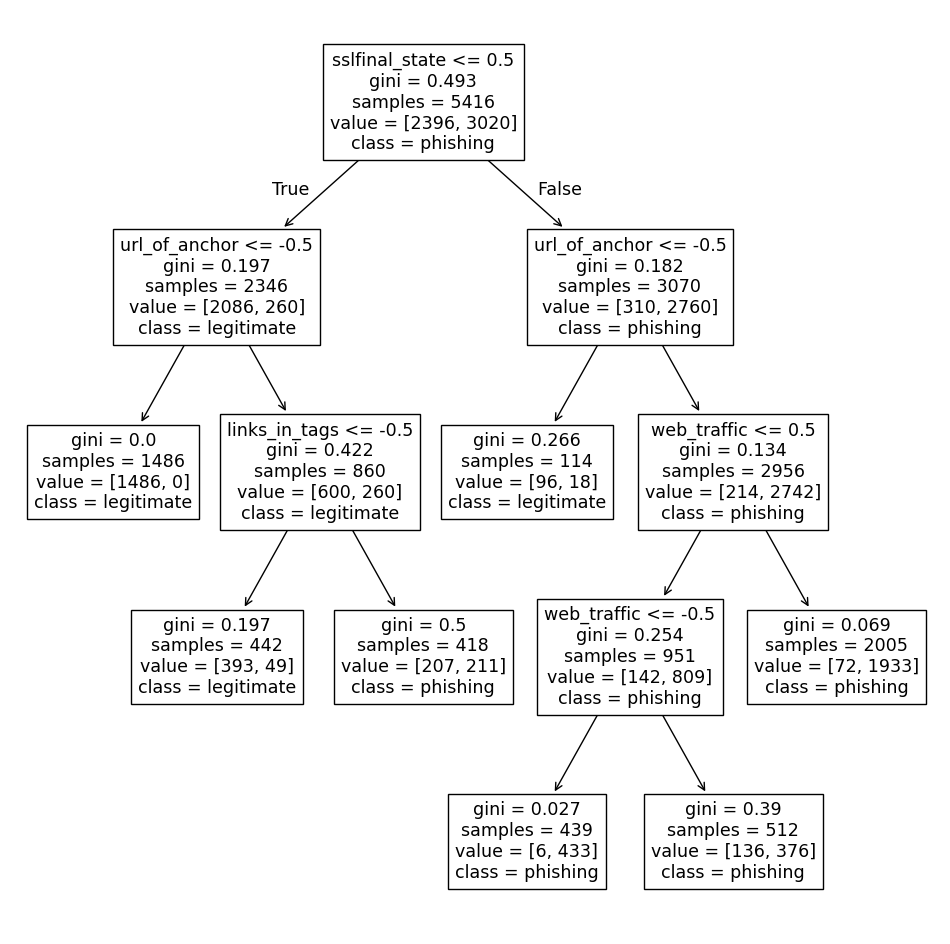

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Build and train decision tree
model = DecisionTreeClassifier(random_state=52, ccp_alpha=0.004, max_depth=4)
model.fit(X_train, y_train)

# Plot the decision tree
fig = plt.figure(figsize=(12, 12))
plot_tree(model, feature_names=X.keys(), class_names=['legitimate', 'phishing'])
plt.show()

# Evaluate decision tree
val_predictions = model.predict(X_val)

### Instructions of decision tree

Check for SSL Connection:
- If there is an SSL connection between the client (usually a browser) and the server:
- Check if there are anchor elements hiding URLs. If yes, the site is a phishing site.
- If not, check the web traffic. If there is web traffic, the site is most likely legitimate.
- If there is no SSL connection:
- Check if there is a suspicious link hiding in an anchor element. If yes, the site is most likely a phishing site.
- If not, check if the number of links in tags is less than or equal to -0.5. If yes, the site is a phishing site.
- If not, check if there are suspicious prefixes or suffixes in the URL. If yes, the site is a phishing site. If no, the site is most likely legitimate.

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'ccp_alpha': [0.0, 0.01]
}

# Create random forest classifier
rf = RandomForestClassifier(random_state=123)

y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

# Use gridsearchcv to find best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

# Train the best model on training set
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Validate the random forest
val_predictions_rf = best_rf.predict(X_val)

# Test the random forest
test_predictions_rf = best_rf.predict(X_test)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9562


# 5. Evaluation

- The performance of the models is evaluated using classification reports and confusion matrices.

### Decision Tree

Validation Report:
               precision    recall  f1-score   support

  Legitimate       0.96      0.79      0.87      1045
    Phishing       0.85      0.97      0.91      1277

    accuracy                           0.89      2322
   macro avg       0.91      0.88      0.89      2322
weighted avg       0.90      0.89      0.89      2322



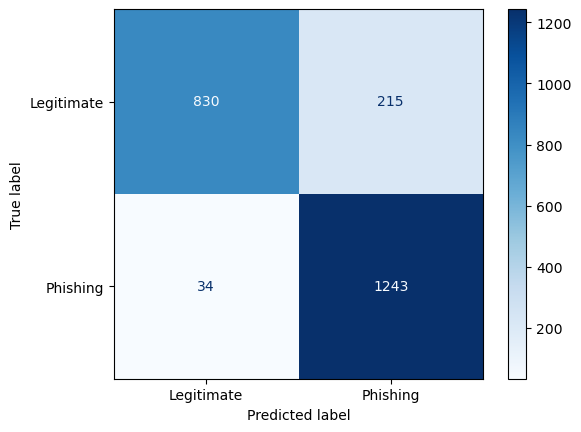

In [12]:
# Evaluate decision tree
val_predictions = model.predict(X_val)
val_report = classification_report(y_val, val_predictions, target_names=['Legitimate', 'Phishing'])
print("Validation Report:\n", val_report)

# Display confusion matrix for validation set
cm = confusion_matrix(y_val, val_predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Legitimate', 'Phishing'])
cmd.plot(cmap='Blues')

### Random Forest

Validation report of random forest:
               precision    recall  f1-score   support

  Legitimate       0.97      0.91      0.94      1045
    Phishing       0.93      0.98      0.95      1277

    accuracy                           0.95      2322
   macro avg       0.95      0.94      0.94      2322
weighted avg       0.95      0.95      0.95      2322

Test report random forest:
               precision    recall  f1-score   support

  Legitimate       0.97      0.92      0.94      1457
    Phishing       0.94      0.97      0.96      1860

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



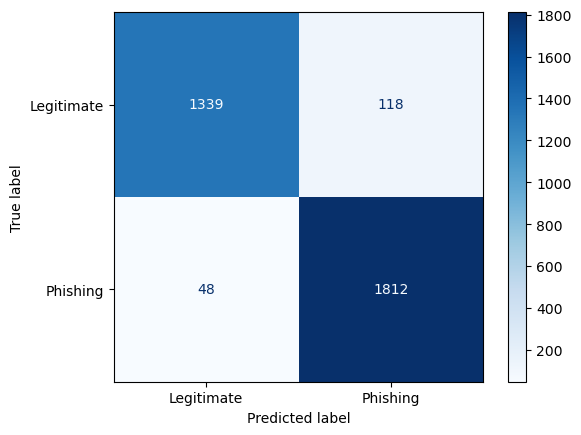

In [13]:
# Validation report of random forest
val_report_rf = classification_report(y_val, val_predictions_rf, target_names=['Legitimate', 'Phishing'])
print(f"Validation report of random forest:\n", val_report_rf)

# Test report of random forest
test_report_rf = classification_report(y_test, test_predictions_rf, target_names=['Legitimate', 'Phishing'])
print(f"Test report random forest:\n", test_report_rf)

# Confusion matrix for the test set
cm_rf = confusion_matrix(y_test, test_predictions_rf)
cmd_rf = ConfusionMatrixDisplay(cm_rf, display_labels=['Legitimate', 'Phishing'])
cmd_rf.plot(cmap='Blues')

# 6. Deployment

### Conclusion

In this assignment, we built and evaluated a decision tree and random forest to predict whether a website is a phishing site or not. The random forest model, after hyperparameter tuning, showed improver performance over decision tree. The final model can be used to construct an automated system to warn user about potential phishing websites.